<a href="https://colab.research.google.com/github/kjahan/semantic_similarity/blob/main/examples/colab/short_text_embeddings_sbert.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Install necessary packages**

[Semantic Textual Similarity](https://www.sbert.net/docs/usage/semantic_textual_similarity.html)


In [1]:
!pip install -U sentence-transformers
!pip3 install seaborn

     |████████████████████████████████| 79 kB 2.3 MB/s 
     |████████████████████████████████| 4.0 MB 32.5 MB/s 
     |████████████████████████████████| 1.2 MB 25.3 MB/s 
     |████████████████████████████████| 77 kB 5.6 MB/s 
     |████████████████████████████████| 880 kB 15.7 MB/s 
     |████████████████████████████████| 596 kB 36.9 MB/s 
     |████████████████████████████████| 6.6 MB 30.4 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.0-py3-none-any.whl size=120747 sha256=8de9c677c52eb73a8945830aaf2c477cf708c3cf0dfe9c20d85ec57a7392d3be
  Stored in directory: /root/.cache/pip/wheels/83/c0/df/b6873ab7aac3f2465aa9144b6b4c41c4391cfecc027c8b07e7
  Created wheel for sacremoses: filename=sacremoses-0.0.53-py3-none-any.whl size=895260 sha256=e84d9299c4239bc989778cc66be7dac30dbe3ca9478d4d62cfce5847bd2b4e3e
  Stored in directory: /root/.cache/pip/wheels/87/39/dd/a83eeef36d0bf98e7a4d1933a4ad2d660295a40613079bafc9
Successfully built sentence-transformers sa

In [2]:
from sentence_transformers import SentenceTransformer, util

import numpy as np
import seaborn as sns
import pandas as pd

import random
import re
import itertools

**Semantic similarity**

In [3]:
model = SentenceTransformer('all-mpnet-base-v2')

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.1k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/571 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/363 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.1k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

## Test short query embeddings

In [13]:
queries_1 = ['econ 101', 'math 200 assignment', 'econ 300 exam']
queries_2 = ['economics 101', 'math 200 homework', 'econ 300 midterm']


In [14]:
# Compute embedding for both lists
embeddings1 = model.encode(queries_1, convert_to_tensor=True)
embeddings2 = model.encode(queries_2, convert_to_tensor=True)

# Compute cosine-similarits
cosine_scores = util.pytorch_cos_sim(embeddings1, embeddings2)

# Output the pairs with their score
for i in range(len(queries_1)):
    print("{} \t\t {} \t\t Score: {:.4f}".format(queries_1[i], queries_2[i], cosine_scores[i][i]))

econ 101 		 economics 101 		 Score: 0.9037
math 200 assignment 		 math 200 homework 		 Score: 0.8842
econ 300 exam 		 econ 300 midterm 		 Score: 0.7983


# Semantic Textual Similarity Task Example

The embeddings produced by the Universal Sentence Encoder are approximately normalized. The semantic similarity of two sentences can be trivially computed as the inner product of the encodings.

In [ ]:
def plot_similarity(labels, features, rotation):
  # Compute cosine-similarits
  corr = util.pytorch_cos_sim(features, features)

  sns.set(font_scale=1.2)
  g = sns.heatmap(
      corr,
      xticklabels=labels,
      yticklabels=labels,
      vmin=0,
      vmax=1,
      cmap="YlOrRd")
  g.set_xticklabels(labels, rotation=rotation)
  g.set_title("Semantic Textual Similarity")

def run_and_plot(messages_):
  # message_embeddings_ = embed(messages_)
  message_embeddings_ = model.encode(messages_, convert_to_tensor=True)
  plot_similarity(messages_, message_embeddings_, 90)

## Similarity Visualized
Here we show the similarity in a heat map. The final graph is a 9x9 matrix where each entry `[i, j]` is colored based on the inner product of the encodings for sentence `i` and `j`.

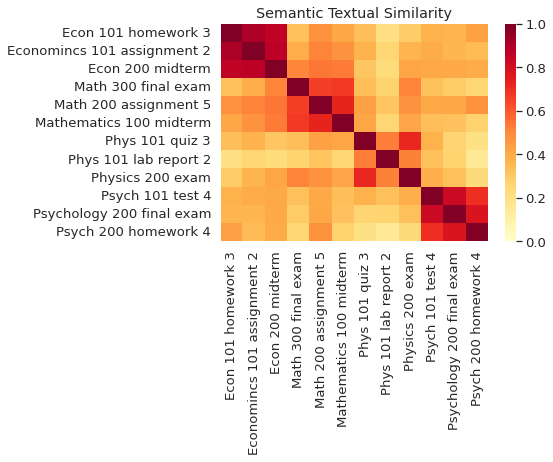

In [ ]:
messages = [
    # Economics
    "Econ 101 homework 3",
    "Economincs 101 assignment 2",
    "Econ 200 midterm",

    # Math
    "Math 300 final exam",
    "Math 200 assignment 5",
    "Mathematics 100 midterm",

    # Physics
    "Phys 101 quiz 3",
    "Phys 101 lab report 2",
    "Physics 200 exam",

    # Psychology
    "Psych 101 test 4",
    "Psychology 200 final exam",
    "Psych 200 homework 4",
]

run_and_plot(messages)

In [22]:
queries_1 = ['econ 101 homework', 'econ 101 homework 2', 'econ 102 homework 2', 'econ 101 midterm', 'econ 101', 'economics 101', 'math 200 homework', 
             'math 200 assignment', 'econ 300 exam', 'mitosis', 'psych 200 assignment 3']
queries_2 = ['econ 101 homework 1']*len(queries_1)

In [24]:
# Compute embedding for both lists
embeddings1 = model.encode(queries_1, convert_to_tensor=True)
embeddings2 = model.encode(queries_2, convert_to_tensor=True)

# Compute cosine-similarits
cosine_scores = util.pytorch_cos_sim(embeddings1, embeddings2)

# Output the pairs with their score
for i in range(len(queries_1)):
    print("{} \t\t {} \t\t Score: {:.4f}".format(queries_2[i], queries_1[i], cosine_scores[i][i]))

econ 101 homework 1 		 econ 101 homework 		 Score: 0.9722
econ 101 homework 1 		 econ 101 homework 2 		 Score: 0.9883
econ 101 homework 1 		 econ 102 homework 2 		 Score: 0.9690
econ 101 homework 1 		 econ 101 midterm 		 Score: 0.9036
econ 101 homework 1 		 econ 101 		 Score: 0.8230
econ 101 homework 1 		 economics 101 		 Score: 0.6949
econ 101 homework 1 		 math 200 homework 		 Score: 0.4198
econ 101 homework 1 		 math 200 assignment 		 Score: 0.4127
econ 101 homework 1 		 econ 300 exam 		 Score: 0.5963
econ 101 homework 1 		 mitosis 		 Score: 0.1566
econ 101 homework 1 		 psych 200 assignment 3 		 Score: 0.4667
